In [119]:
import warnings
warnings.filterwarnings(action='once')


In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
import matplotlib.pyplot as plt

from imblearn.under_sampling import RandomUnderSampler

from sklearn import tree, svm
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

/Users/001141585/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [123]:
df = pd.read_csv('full_devices.csv', encoding = "ISO-8859-1")

/Users/001141585/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [98]:
set(df.failure)

{0, 1}

Foi avaliado que existe um desbalanço entre as classes do campo failure, sendo que 1 (falha) aparece apenas 106 registros e o restante como 0. 

No periodo de 2015, periodo do dataset, possui 124494 registros no total sendo apenas 106 de falha. Devido a essa especifidade nos dados mais a frente foi usado o médoto under-sampling para balanceamento das classes.


- 1169 - distinct "device" coluna categorica 

In [102]:
len(df[(df.failure==1)])

106

In [39]:
x = df.select_dtypes(exclude=['number']).apply(LabelEncoder().fit_transform)\
                    .join(df.select_dtypes(include=['number']))

y = df['failure'].values
x.drop('failure',axis=1, inplace=True)
x = x.values

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 10)

In [41]:
len(x_train[0])-len(list(df))

-1

# Aplicando Standard Scaler para todos os testes a partir deste ponto

In [42]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [43]:
classifier = LogisticRegression(random_state = 10)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=10)

In [44]:
y_pred = classifier.predict(x_test)
test_acc = accuracy_score(y_test, y_pred)
print("Acurácia no teste {}".format(test_acc*100))

Acurácia no teste 99.90270165082866


Text(0.5, 33.0, 'Valores Preditos')

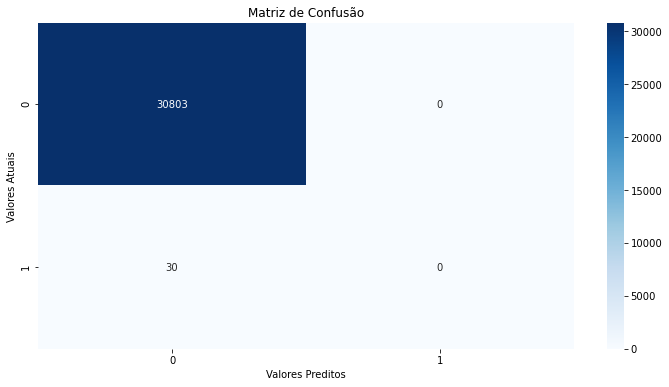

In [45]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Matriz de Confusão")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Valores Atuais")
plt.xlabel("Valores Preditos")

O resultado mostra o desbalanceamento nos dados, como esperado, uma vez que nenhum dado de teste da classe 1 (falha) foi previsto com sucesso. Apenas o dado de sem falha que foi previsto com sucesso todas as vezes sem erro. Porem como é evidente o desbalanceamento não é estranho notar-se a overfiting.
Como é possivel ver nas próximas 4 linhas, a quantidade de falhas é extremamente reduzida no dataset, sendo necessário um balanceamento. 

In [103]:
list(y_test).count(1)

30

In [104]:
list(y_train).count(1)

76

In [107]:
list(y_test).count(0)

30803

In [108]:
list(y_train).count(0)

92422

In [78]:
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9997    0.8902    0.9418     30803
           1     0.0062    0.7000    0.0122        30

    accuracy                         0.8900     30833
   macro avg     0.5029    0.7951    0.4770     30833
weighted avg     0.9987    0.8900    0.9408     30833

Acurácia: 0.8900



# Usar técnica de under-sampling para balanceamento das classes

O método usado no balanceamento das classes foi o Under-sampling. Todos os métodos testados a partir desta etapa, utilizaram como variaveis de treino a saida deste método (RandomUnderSampler), sendo nomeadas como "x_res" e "y_res"

Balanceamento das Classes
0    76
1    76
dtype: int64


/Users/001141585/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


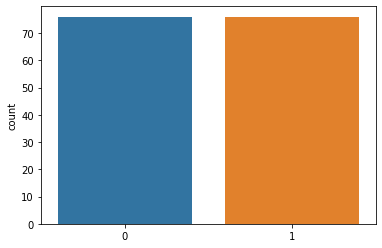

In [109]:

rus = RandomUnderSampler()
x_res, y_res = rus.fit_sample(x_train, y_train)
print("Balanceamento das Classes")
print(pd.Series(y_res).value_counts())
# plotar a nova distribuição de classes
sns.countplot(y_res);

# Novo teste com Logistic Regression

In [110]:

model_res = LogisticRegression()
model_res.fit(x_res, y_res)

y_pred_res = model_res.predict(x_test)
y_proba_res = model_res.predict_proba(x_test)

In [111]:
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_res, digits=4))
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_res)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9994    0.9562    0.9773     30803
           1     0.0088    0.4000    0.0173        30

    accuracy                         0.9557     30833
   macro avg     0.5041    0.6781    0.4973     30833
weighted avg     0.9984    0.9557    0.9764     30833

Acurácia: 0.9557



Text(0.5, 33.0, 'Valores Preditos')

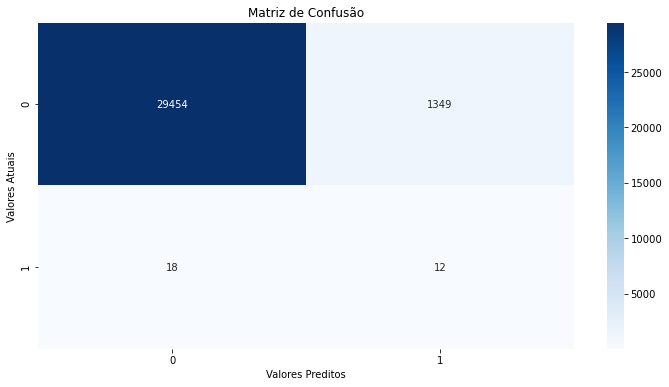

In [113]:
cm=confusion_matrix(y_test,y_pred_res)
plt.figure(figsize=(12,6))
plt.title("Matriz de Confusão")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Valores Atuais")
plt.xlabel("Valores Preditos")

É possivel observar, que agora o modelo possui a capacidade de generalizar maior, reduzido a acurácia geral, porém acertando alguns itens da classe 1 (falha). O unico ponto adicionado do modelo anterior para esse foi apenas o tratamento de balanceamento. 

In [114]:
y_pred = classifier.predict(x_test)
test_acc = accuracy_score(y_test, y_pred_res)
print("Acurácia no teste {}".format(test_acc*100))

Acurácia no teste 95.5664385560925


# Random Forest

In [115]:
treeclass = RandomForestClassifier(n_estimators=2000)
treeclass.fit(x_res, y_res)
y_pred = treeclass.predict(x_test)
y_pred_prob = treeclass.predict_proba(x_test)
accuracy = treeclass.score(x_test, y_test)


Text(0.5, 33.0, 'Valores Preditos')

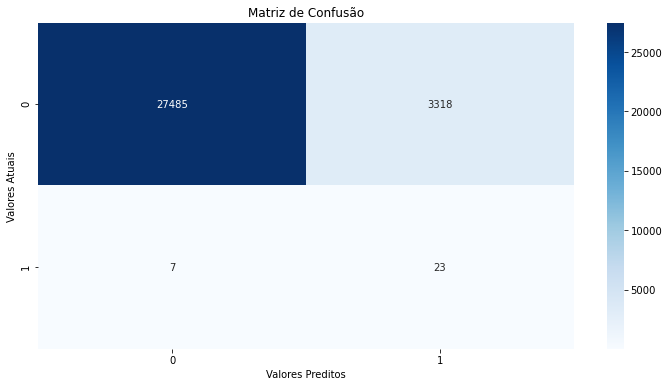

In [116]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Matriz de Confusão")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Valores Atuais")
plt.xlabel("Valores Preditos")

É possivel observar que esse é o método que possui a melhor capacidade de generalizar até o momento. Ele possui acertividade aproximada de 89.22% para a classe 0 (sem falhas), enquanto 76,66% para a classe de 1 (falha).

In [117]:
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9997    0.8923    0.9430     30803
           1     0.0069    0.7667    0.0136        30

    accuracy                         0.8922     30833
   macro avg     0.5033    0.8295    0.4783     30833
weighted avg     0.9988    0.8922    0.9421     30833

Acurácia: 0.8922



# SVM

In [73]:
clf = svm.SVC()
clf.fit(x_res,y_res)

SVC()

In [75]:
y_pred_res = clf.predict(x_test)

In [76]:
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_res, digits=4))
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_res)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9993    0.9879    0.9936     30803
           1     0.0262    0.3333    0.0485        30

    accuracy                         0.9873     30833
   macro avg     0.5128    0.6606    0.5211     30833
weighted avg     0.9984    0.9873    0.9927     30833

Acurácia: 0.9873



Text(0.5, 33.0, 'Valores Preditos')

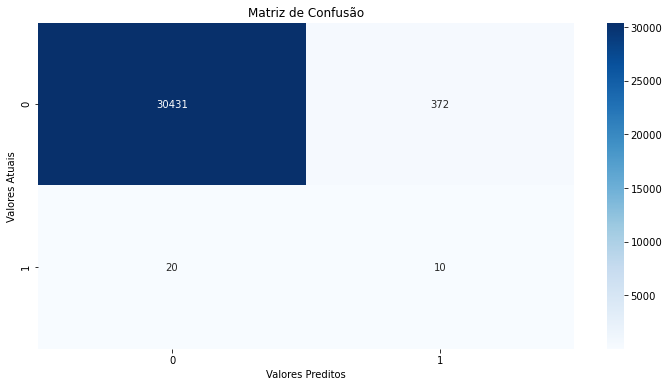

In [77]:
cm=confusion_matrix(y_test,y_pred_res)
plt.figure(figsize=(12,6))
plt.title("Matriz de Confusão")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Valores Atuais")
plt.xlabel("Valores Preditos")

O método em questão possui uma acertividade maior que a anterior de 98,73%, porem quando analisado a generalização visto que a classe de falha possui acertividade aproximada de 33%, não possui um equilibrio suficiente para previsão de falhas.